# 1. Introduction

In the dynamic landscape of eCommerce, understanding customer behavior through data analytics is pivotal for informed decision-making. Our recent project with **Blackwell**, a longstanding leader in electronics retail, underscores this principle. Over the past year, Blackwell's venture into eCommerce has opened new avenues for capturing customer transaction data, both online and in-store. This data presents an opportunity to enhance our marketing strategies, optimize the website, and ultimately drive revenue growth.

## 1.1 Project Overview

Our analysis journey began with an exploration of customer transaction patterns to uncover regional spending differences and the relationship between the number of items purchased and the transaction amount. We used **data mining techniques** to identify these patterns, providing valuable insights to the eCommerce team. Building on these findings, we delved deeper into customer demographics, particularly focusing on age-related purchasing behaviors and the contrast between online and in-store shoppers. This phase involved **machine learning models** to predict customer age and buying preferences, aligning with hypotheses from our VP of Sales, Martin Goodrich.

The culmination of our efforts has drawn the attention of Mike Dobson, Blackwell's CEO, who is keen on understanding the implications of our data mining efforts and considering future investments in this area. We have prepared a comprehensive presentation to elucidate the questions we addressed, the methodologies employed, and the results obtained. Additionally, we will present potential future applications of data mining to foster data-driven decisions across all facets of Blackwell’s eBusiness.

## 1.2 Deliverables

This deliverable includes:
1. **Data Analysis Report:** Detailed findings on customer transaction behaviors, regional spending patterns, and age demographics.
2. **Predictive Modeling Insights:** Results from machine learning models predicting customer age and purchasing channels.
3. **Presentation for CEO:** Simplified explanation of our data mining process, results, and future opportunities for leveraging data analytics in eCommerce.
4. **Recommendations Report:** Technical insights and strategic recommendations for future data analytics projects at Blackwell.

By harnessing the power of data analytics, Blackwell can continue to innovate and stay ahead in the competitive eCommerce market, making informed decisions that cater to customer needs and drive business success.


# 2. Data Cleaning

Before diving into the analysis, it is essential to ensure that the data we are working with is clean, accurate, and well-structured. Data cleaning is a crucial step in any data analysis project as it helps to improve the quality of the data, leading to more reliable and valid results. Here, we outline the data cleaning steps we performed on Blackwell's customer transaction data.

## 2.1 Purpose of Data Cleaning

The primary objectives of data cleaning in this project were to:
- Remove any inconsistencies or errors in the data.
- Handle missing values appropriately.
- Ensure that the data is in a suitable format for analysis.
- Enhance the accuracy of our findings.

## 2.2 Data Cleaning Practices

Removing duplicate entries: we identified and removed any duplicate transaction records to ensure that each transaction is unique..drop_duplicates()


# 3. EDA: Exploratory Data Analysis

## 3.1 Introduction

Exploratory Data Analysis (EDA) is a critical step in understanding the underlying patterns, trends, and relationships within the dataset. In this section, we will perform EDA on Blackwell's customer transaction data to uncover valuable insights that will inform our subsequent analysis and modeling efforts.

## 3.2 Load Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('Demographic_Data.csv')

## 3.3 Univariate Analysis

In [10]:
data_region_agrupado = data.groupby('region').mean()

data_region_agrupado.reset_index(inplace = True)

data_region_agrupado

,region,in-store,age,items,amount
0,1,1.000000,43.703938,4.510063,745.161491
1,2,0.000000,56.610350,4.512750,252.109196
2,3,0.611056,45.646944,4.494000,917.969637
3,4,0.500038,38.750731,4.503462,1284.052012


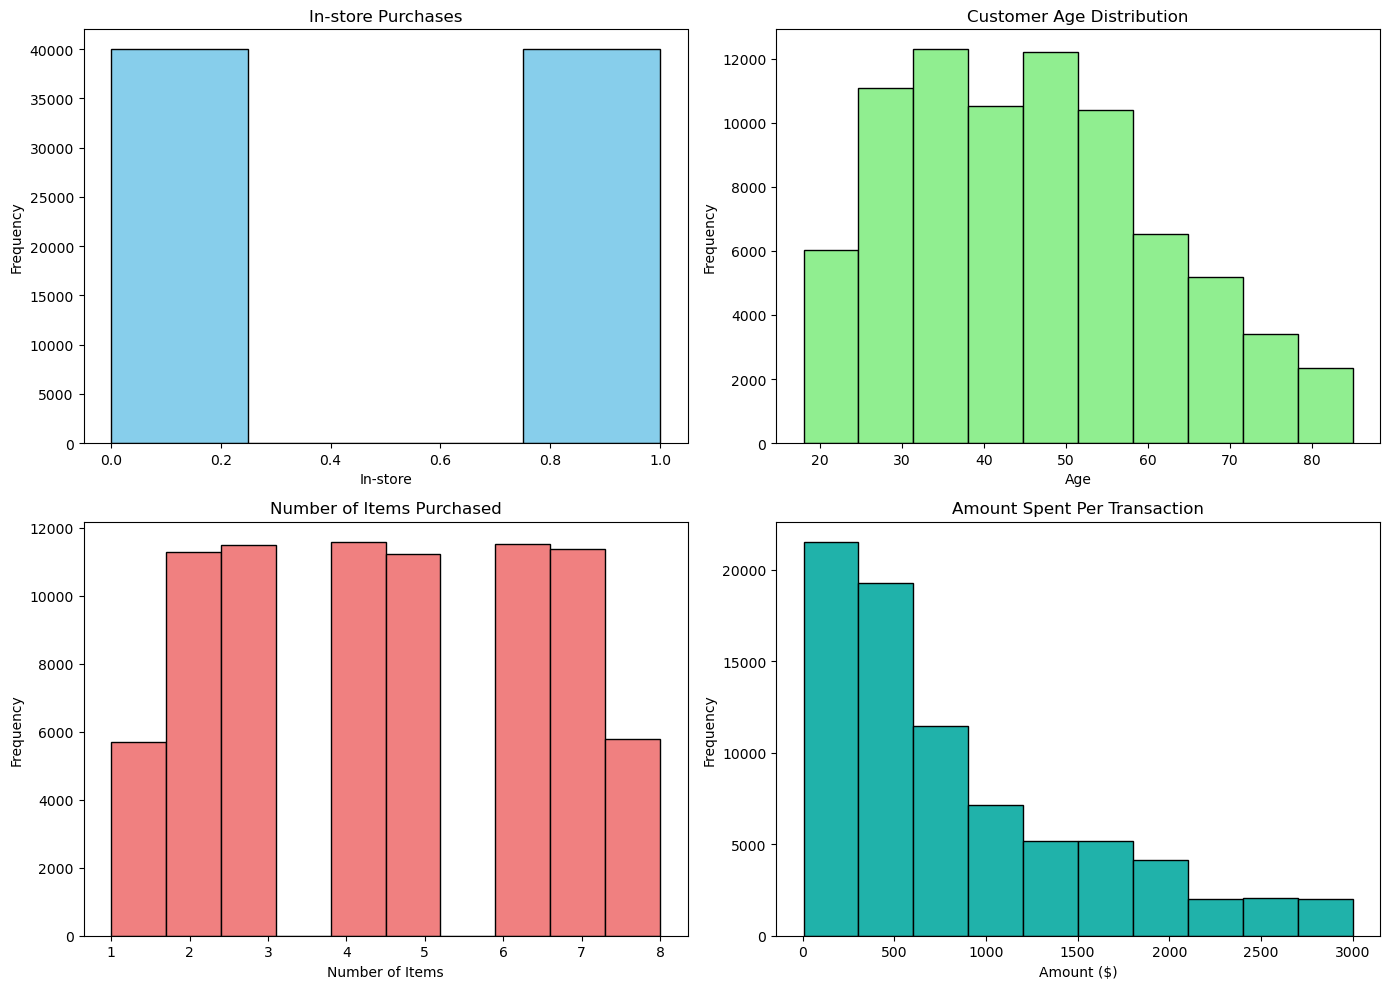

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for in-store purchases
axs[0, 0].hist(data['in-store'], bins=4, color='skyblue', edgecolor='black')
axs[0, 0].set_title('In-store Purchases')
axs[0, 0].set_xlabel('In-store')
axs[0, 0].set_ylabel('Frequency')

# Histogram for age
axs[0, 1].hist(data['age'], bins=10, color='lightgreen', edgecolor='black')
axs[0, 1].set_title('Customer Age Distribution')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

# Histogram for number of items purchased
axs[1, 0].hist(data['items'], bins=10, color='lightcoral', edgecolor='black')
axs[1, 0].set_title('Number of Items Purchased')
axs[1, 0].set_xlabel('Number of Items')
axs[1, 0].set_ylabel('Frequency')

# Histogram for amount spent
axs[1, 1].hist(data['amount'], bins=10, color='lightseagreen', edgecolor='black')
axs[1, 1].set_title('Amount Spent Per Transaction')
axs[1, 1].set_xlabel('Amount ($)')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


- As we can see, the number of sales online is similar to the number of sales in store.
- The age distribution remains mostly constant until the age of 60, where it starts to decrease.
- The number of items purchased is a constant variable.
- obviously, the amount spent is a decreasing variable.

## 3.2 Bivariate Analysis

### 3.2.1 Amount Spent vs Region

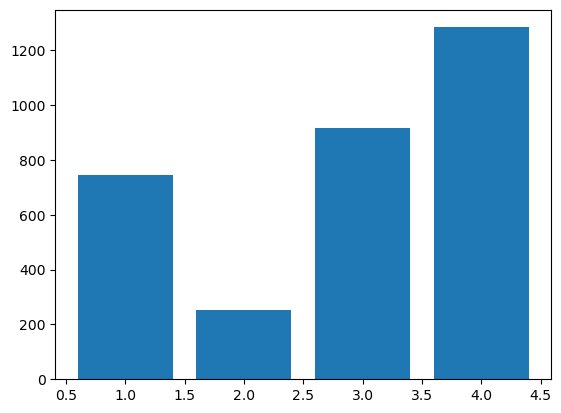

In [15]:
plt.bar(data_region_agrupado['region'],data_region_agrupado['amount'])

plt.show()

- The region with the biggest amount spent is region 4, which makes sense since the company was founded there.

### 3.2.2 Region vs Age

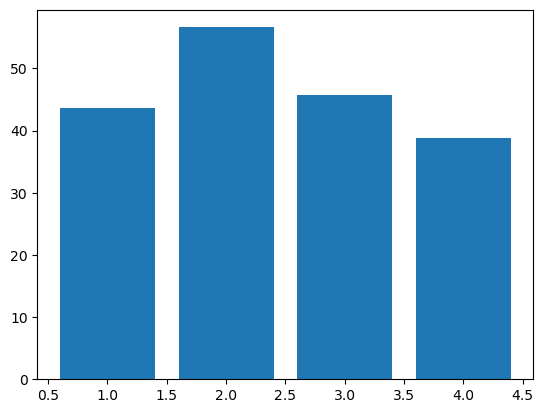

In [18]:
plt.bar(data_region_agrupado['region'],data_region_agrupado['age'])

plt.show()

- Region 2 has the eldest costumers, which could be strange as we only sale via online

### 3.2.3 In-Store vs Amount

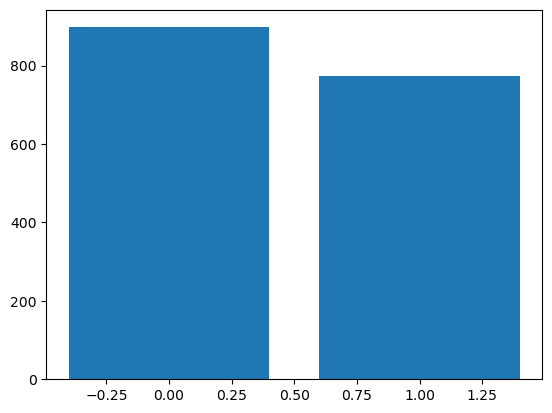

In [21]:
data_instore_agrupado = data.groupby('in-store').mean()
data_instore_agrupado.reset_index(inplace = True)

plt.bar(data_instore_agrupado['in-store'],data_instore_agrupado['amount'])

plt.show()

- As we can see, the amount of money we get from in store sales is a little bigger than the online sales

### 3.2.4 Number of Items vs Amount

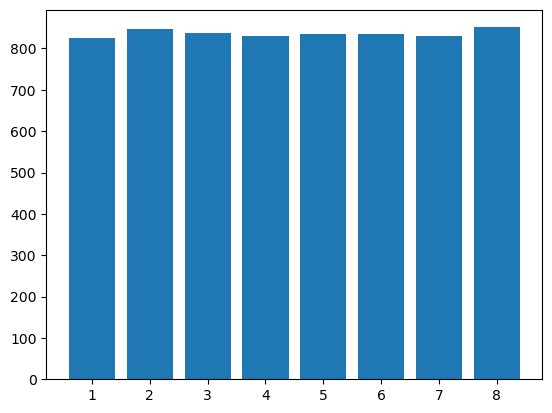

In [24]:
data_items_agrupado = data.groupby('items').mean()
data_items_agrupado.reset_index(inplace = True)

plt.bar(data_items_agrupado['items'],data_items_agrupado['amount'])

plt.show()

- The number of items purchased is not a significant variable.

## 3.3 Multivariate analysis

In this section, we will analyze the relationships between multiple variables to uncover complex interactions and patterns. We'll use visualizations such as pair plots, heatmaps, and regression plots to explore these relationships.

### 3.3.1 Correlation Matrix

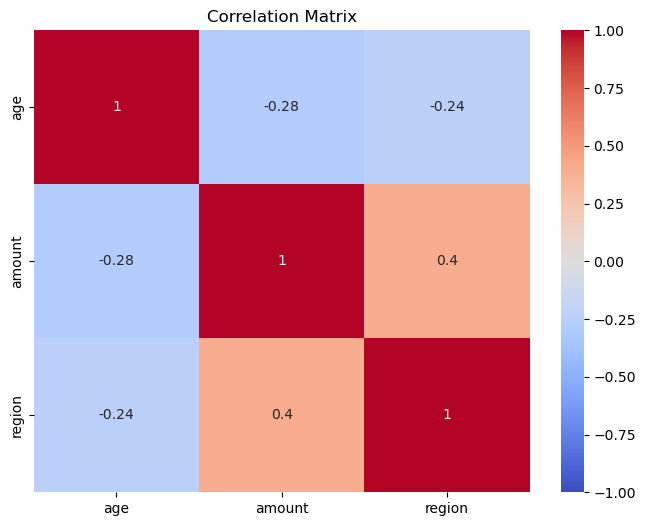

In [29]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data[['age', 'amount', 'region']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### 3.3.2 Channels vs Amount

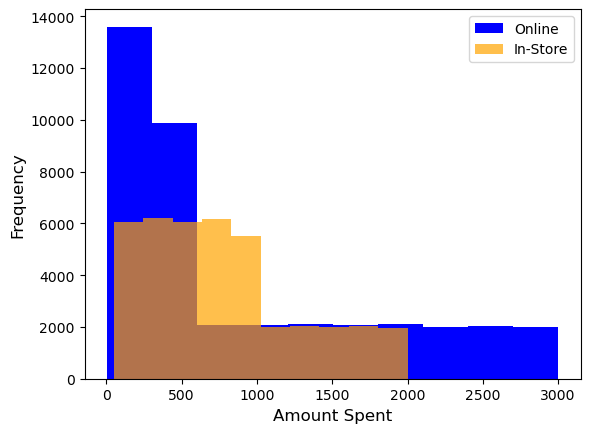

In [31]:
data_online = data.loc[data['in-store'] == 0,:]
data_offline = data.loc[data['in-store'] == 1,:]

plt.hist(data_online['amount'], label = 'Online', color='blue')
plt.hist(data_offline['amount'], alpha = 0.7, label = 'In-Store', color='orange')

plt.xlabel('Amount Spent', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.legend()

plt.show()

- Let's divide it per region

In [33]:
data_region1 = data.loc[data['region'] == 1,:]
data_region2 = data.loc[data['region'] == 2,:]
data_region3 = data.loc[data['region'] == 3,:]
data_region4 = data.loc[data['region'] == 4,:]

In [34]:
data_region1_online = data_region1.loc[data_region1['in-store'] == 0,:]
data_region1_offline = data_region1.loc[data_region1['in-store'] == 1,:]

data_region2_online = data_region2.loc[data_region2['in-store'] == 0,:]
data_region2_offline = data_region2.loc[data_region2['in-store'] == 1,:]

data_region3_online = data_region3.loc[data_region3['in-store'] == 0,:]
data_region3_offline = data_region3.loc[data_region3['in-store'] == 1,:]

data_region4_online = data_region4.loc[data_region4['in-store'] == 0,:]
data_region4_offline = data_region4.loc[data_region4['in-store'] == 1,:]

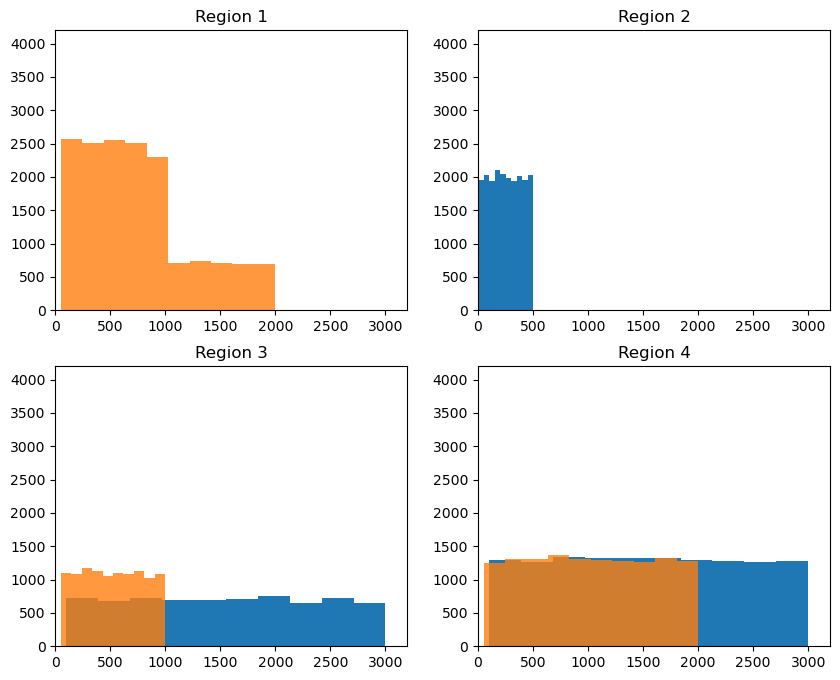

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot for Region 1
axs[0, 0].hist(data_region1_online['amount'])
axs[0, 0].hist(data_region1_offline['amount'], alpha = 0.8)
axs[0, 0].set_title('Region 1')
axs[0, 0].set_xlim(0, 3200)
axs[0, 0].set_ylim(0, 4200)

# Plot for Region 2
axs[0, 1].hist(data_region2_online['amount'])
axs[0, 1].hist(data_region2_offline['amount'], alpha = 0.8)
axs[0, 1].set_title('Region 2')
axs[0, 1].set_xlim(0, 3200)
axs[0, 1].set_ylim(0, 4200)

# Plot for Region 3
axs[1, 0].hist(data_region3_online['amount'])
axs[1, 0].hist(data_region3_offline['amount'], alpha = 0.8)
axs[1, 0].set_title('Region 3')
axs[1, 0].set_xlim(0, 3200)
axs[1, 0].set_ylim(0, 4200)

# Plot for Region 4
axs[1, 1].hist(data_region4_online['amount'])
axs[1, 1].hist(data_region4_offline['amount'], alpha = 0.8)
axs[1, 1].set_title('Region 4')
axs[1, 1].set_xlim(0, 3200)
axs[1, 1].set_ylim(0, 4200)

plt.show()

- First of all, we can see that regions 1 and 2 are the different ones, as they only use one channel of sales
- Regions 3 and 4 are very similar, with the difference that online sales have their decrease point at different places

### 3.3.3 Channels per region vs age

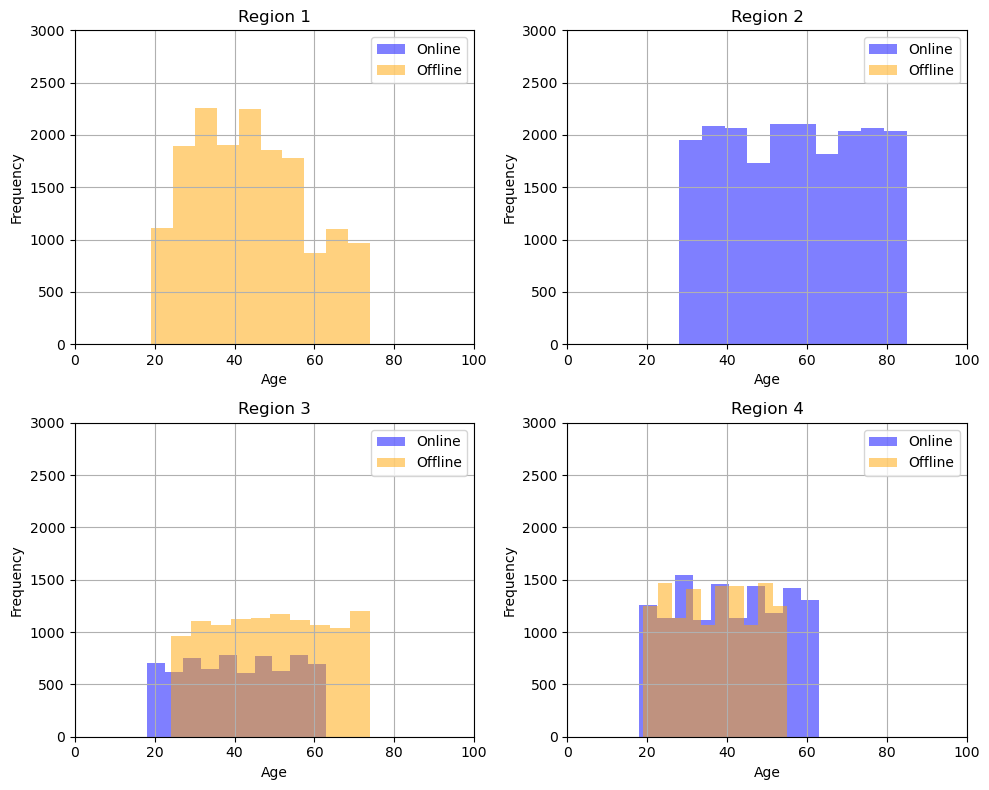

In [38]:
import matplotlib.pyplot as plt


# Data for all regions
data = [
    (data_region1_online, data_region1_offline, 'Region 1'),
    (data_region2_online, data_region2_offline, 'Region 2'),
    (data_region3_online, data_region3_offline, 'Region 3'),
    (data_region4_online, data_region4_offline, 'Region 4')
]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Define common x and y limits
x_limits = (0, 100)
y_limits = (0, 3000)

# Loop through regions and plot
for ax, (online_data, offline_data, title) in zip(axs.ravel(), data):
    ax.hist(online_data['age'], label='Online', alpha=0.5, color='blue')
    ax.hist(offline_data['age'], label='Offline', alpha=0.5, color='orange')
    ax.set_title(title)
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

- Well, certain similarities are appreciated between regions 3 and 4 (east and west coasts) with the difference that on the east coast there are more people over 60 years old shopping, and they do so in person. This may be because the company was founded there and is therefore well known by all generations.
- Since there are no online sales in region 1, all sales are concentrated in the physical store, where there is a drop-off from age 60 onward that I don't quite understand, since in zone 2 (all online) this decline does not occur. In fact, sales remain very steady even into the older ages.

# 4. Modeling

Creating a machine learning model to predict one of the variables in our dataset can provide us valuable insights and help optimize various business strategies. Here are several reasons:

- 1. **Understanding Customer Behavior**: 
     Predicting a variable such as the amount spent, number of items purchased, or whether a transaction will be online or in-store can help understand customer behavior. By identifying the factors that influence these outcomes, you can tailor your marketing and sales strategies to better meet customer needs.
- 2. **Targeted Marketing**: 
     A predictive model can identify which customers are more likely to spend more or purchase more items. This allows for more targeted marketing campaigns, ensuring that promotional efforts are directed towards the customers who are most likely to respond positively, thereby increasing the return on investment (ROI).
- 3. **Personalized Customer Experience**: 
     Predicting customer preferences and behaviors can help personalize the shopping experience. For example, if you can predict that certain customers prefer shopping online, you can offer them special online-only promotions or tailored recommendations.
- 4. **Improving User Experience**: 
     By analyzing factors that influence online and in-store purchases, you can make informed decisions about website design and in-store layout, improving the overall user experience.
- 5. **Identifying Trends and Patterns**: 
     A predictive model can help identify trends and patterns that are not immediately obvious. For example, you might discover that certain regions have higher spending patterns, which could influence regional marketing strategies.

In [42]:
# SKLearn stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

## 4.1 Model to predict region

In [44]:
data = pd.read_csv('Demographic_Data.csv')

y = data['region']
x = data[['in-store', 'age', 'items', 'amount']]

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

algoritmo = DecisionTreeClassifier()

modelo = algoritmo.fit(x_train, y_train)

In [46]:
predicciones = modelo.predict(x_test)

print(classification_report(predicciones, y_test))

              precision    recall  f1-score   support

           1       0.40      0.39      0.39      3266
           2       0.89      0.91      0.90      3900
           3       0.36      0.36      0.36      3633
           4       0.54      0.54      0.54      5201

    accuracy                           0.56     16000
   macro avg       0.55      0.55      0.55     16000
weighted avg       0.56      0.56      0.56     16000



- Region 2 has high accuracy because all its purchases are online, which helps the model. Additionally, it is the only one where customers over 80 years old are included, and its sales remain stable regardless of the customers' age.

## 4.2 Model to predict 'in-store'

In [49]:
y = data['in-store']
x = data[['age', 'items', 'amount', 'region']]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

algoritmo = DecisionTreeClassifier()

modelo = algoritmo.fit(x_train, y_train)

predicciones = modelo.predict(x_test)

print(classification_report(predicciones, y_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      7988
           1       0.85      0.85      0.85      8012

    accuracy                           0.85     16000
   macro avg       0.85      0.85      0.85     16000
weighted avg       0.85      0.85      0.85     16000



## 2.3 Model to predict age

In [52]:
y = data['age']

x = data[['in-store', 'items', 'amount', 'region']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

algoritmo = DecisionTreeClassifier()

modelo = algoritmo.fit(x_train, y_train)

predicciones = modelo.predict(x_test)

print(classification_report(predicciones, y_test))

              precision    recall  f1-score   support

          18       0.00      0.00      0.00        65
          19       0.01      0.01      0.01       142
          20       0.02      0.02      0.02       232
          21       0.02      0.02      0.02       190
          22       0.02      0.01      0.02       204
          23       0.04      0.03      0.04       201
          24       0.03      0.03      0.03       248
          25       0.03      0.03      0.03       286
          26       0.01      0.01      0.01       262
          27       0.02      0.02      0.02       249
          28       0.04      0.03      0.03       329
          29       0.02      0.02      0.02       327
          30       0.02      0.02      0.02       341
          31       0.03      0.04      0.03       329
          32       0.02      0.02      0.02       368
          33       0.02      0.02      0.02       347
          34       0.01      0.01      0.01       374
          35       0.03    

- We need to discretize the classes.

In [54]:
data['age group'] = pd.qcut(data['age'], q = 3, labels = ['Joven', 'Adulto', 'Viejo'])

y = data['age group']

x = data[['in-store', 'items', 'amount', 'region']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

algoritmo = DecisionTreeClassifier()

modelo = algoritmo.fit(x_train, y_train)

predicciones = modelo.predict(x_test)

print(classification_report(predicciones, y_test))

              precision    recall  f1-score   support

      Adulto       0.34      0.35      0.34      5286
       Joven       0.40      0.40      0.40      5572
       Viejo       0.42      0.42      0.42      5142

    accuracy                           0.39     16000
   macro avg       0.39      0.39      0.39     16000
weighted avg       0.39      0.39      0.39     16000



Let's use smote for oversampling

In [56]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

algoritmo = DecisionTreeClassifier()

modelo = algoritmo.fit(x_train_resampled, y_train_resampled)

predicciones = modelo.predict(x_test)

print(classification_report(predicciones, y_test))

              precision    recall  f1-score   support

      Adulto       0.34      0.35      0.35      5287
       Joven       0.40      0.40      0.40      5450
       Viejo       0.43      0.42      0.42      5263

    accuracy                           0.39     16000
   macro avg       0.39      0.39      0.39     16000
weighted avg       0.39      0.39      0.39     16000



In [57]:
y = data['in-store']
x = data[['age', 'items', 'amount', 'region']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

algoritmo = DecisionTreeClassifier()

modelo = algoritmo.fit(x_train, y_train)

predicciones = modelo.predict(x_test)

print(classification_report(predicciones, y_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7996
           1       0.85      0.85      0.85      8004

    accuracy                           0.85     16000
   macro avg       0.85      0.85      0.85     16000
weighted avg       0.85      0.85      0.85     16000



In [58]:
# y = data['in-store']
# x = data[['age', 'items', 'amount', 'region']]

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

algoritmo = RandomForestClassifier()

modelo = algoritmo.fit(x_train, y_train)

predicciones = modelo.predict(x_test)

print(classification_report(predicciones, y_test))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7440
           1       0.90      0.84      0.87      8560

    accuracy                           0.86     16000
   macro avg       0.86      0.87      0.86     16000
weighted avg       0.87      0.86      0.86     16000



In [59]:
# y = data['in-store']
# x = data[['age', 'items', 'amount', 'region']]

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

algoritmo = GradientBoostingClassifier()

modelo = algoritmo.fit(x_train, y_train)

predicciones = modelo.predict(x_test)

print(classification_report(predicciones, y_test))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      6168
           1       1.00      0.82      0.90      9832

    accuracy                           0.89     16000
   macro avg       0.89      0.91      0.89     16000
weighted avg       0.91      0.89      0.89     16000



In [60]:
import xgboost as xgb

In [61]:
algoritmo = xgb.XGBClassifier()

modelo = algoritmo.fit(x_train, y_train)

predicciones = modelo.predict(x_test)

print(classification_report(predicciones, y_test))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87      6386
           1       0.98      0.82      0.90      9614

    accuracy                           0.89     16000
   macro avg       0.88      0.90      0.88     16000
weighted avg       0.90      0.89      0.89     16000



In [62]:
scores = cross_val_score(algoritmo, x_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean cross-validation score: {scores.mean():.2f}")

Cross-validation scores: [0.88445312 0.88445312 0.88328125 0.88023438 0.8821875 ]
Mean cross-validation score: 0.88
